In [16]:
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

arcene = fetch_openml(name='arcene', version=1)

df = pd.DataFrame(data=arcene.data, columns=arcene.feature_names)
df['target'] = arcene.target

print(df.shape)
print(df.head())

(200, 10001)
    V1  V2   V3   V4  V5   V6   V7  V8  V9  V10  ...  V9992  V9993  V9994  \
0    0  71    0   95   0  538  404  20   0    0  ...    570     86      0   
1    0  41   82  165  60  554  379   0  71    0  ...    605     69      7   
2    0   0    1   40   0  451  402   0   0    0  ...    593     28      0   
3    0  56   44  275  14  511  470   0   0    0  ...    600      0     26   
4  105   0  141  348   0  268  329   0   0    1  ...      0      0      0   

   V9995  V9996  V9997  V9998  V9999  V10000  target  
0     36      0     80      0      0     524       1  
1    473      0     57      0    284     423       2  
2     24      0     90      0     34     508       1  
3     86      0    102      0      0     469       1  
4      0    190    301      0      0     354       2  

[5 rows x 10001 columns]


In [17]:
print(df.describe())

               V1          V2          V3          V4          V5          V6  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean    35.385000   37.055000   60.305000  325.425000   17.055000  410.940000   
std     48.755742   37.954905   71.168439  155.169819   27.095068  105.681404   
min      0.000000    0.000000    0.000000    0.000000    0.000000  181.000000   
25%      0.000000    0.750000    0.000000  211.500000    0.000000  311.750000   
50%     10.500000   27.500000   23.500000  334.000000    0.000000  431.500000   
75%     54.000000   59.250000  116.000000  433.750000   29.500000  497.000000   
max    194.000000  218.000000  240.000000  705.000000  109.000000  635.000000   

               V7          V8          V9         V10  ...       V9991  \
count  200.000000  200.000000  200.000000  200.000000  ...  200.000000   
mean   226.310000    7.695000   48.795000   70.765000  ...  376.420000   
std    181.533678   14.893659   58.164927   96.7

In [18]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values != 0]
columns_with_missing_values

Series([], dtype: int64)

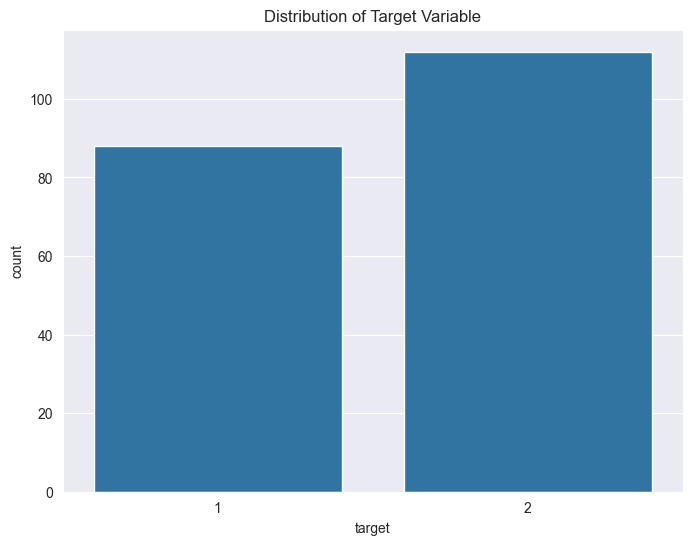

In [19]:
# Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

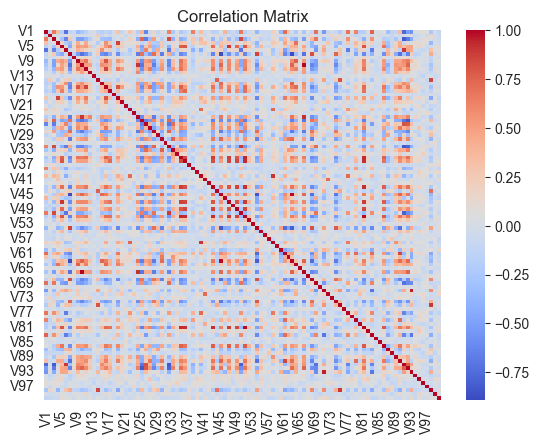

In [25]:
correlation_matrix = df[df.columns[:100]].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

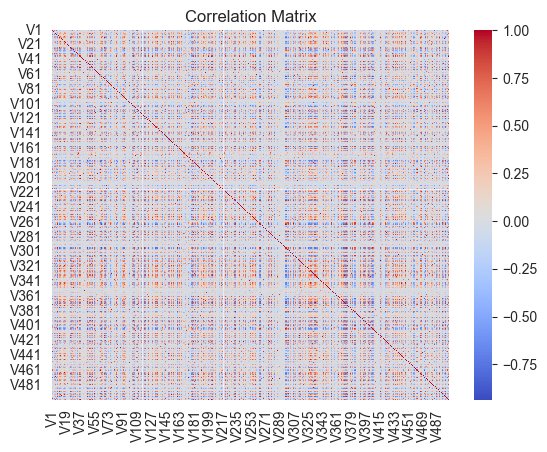

In [26]:
correlation_matrix = df[df.columns[:500]].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca_result = pca.fit_transform(df)
print(f'Explained variance by PCA: {pca.explained_variance_ratio_} = {sum(pca.explained_variance_ratio_)}')


Explained variance by PCA: [0.42225429 0.23190258 0.05886215 0.0321837  0.0241662  0.0188999
 0.0183242  0.0128299  0.0117386  0.00801135] = 0.8391728802696227


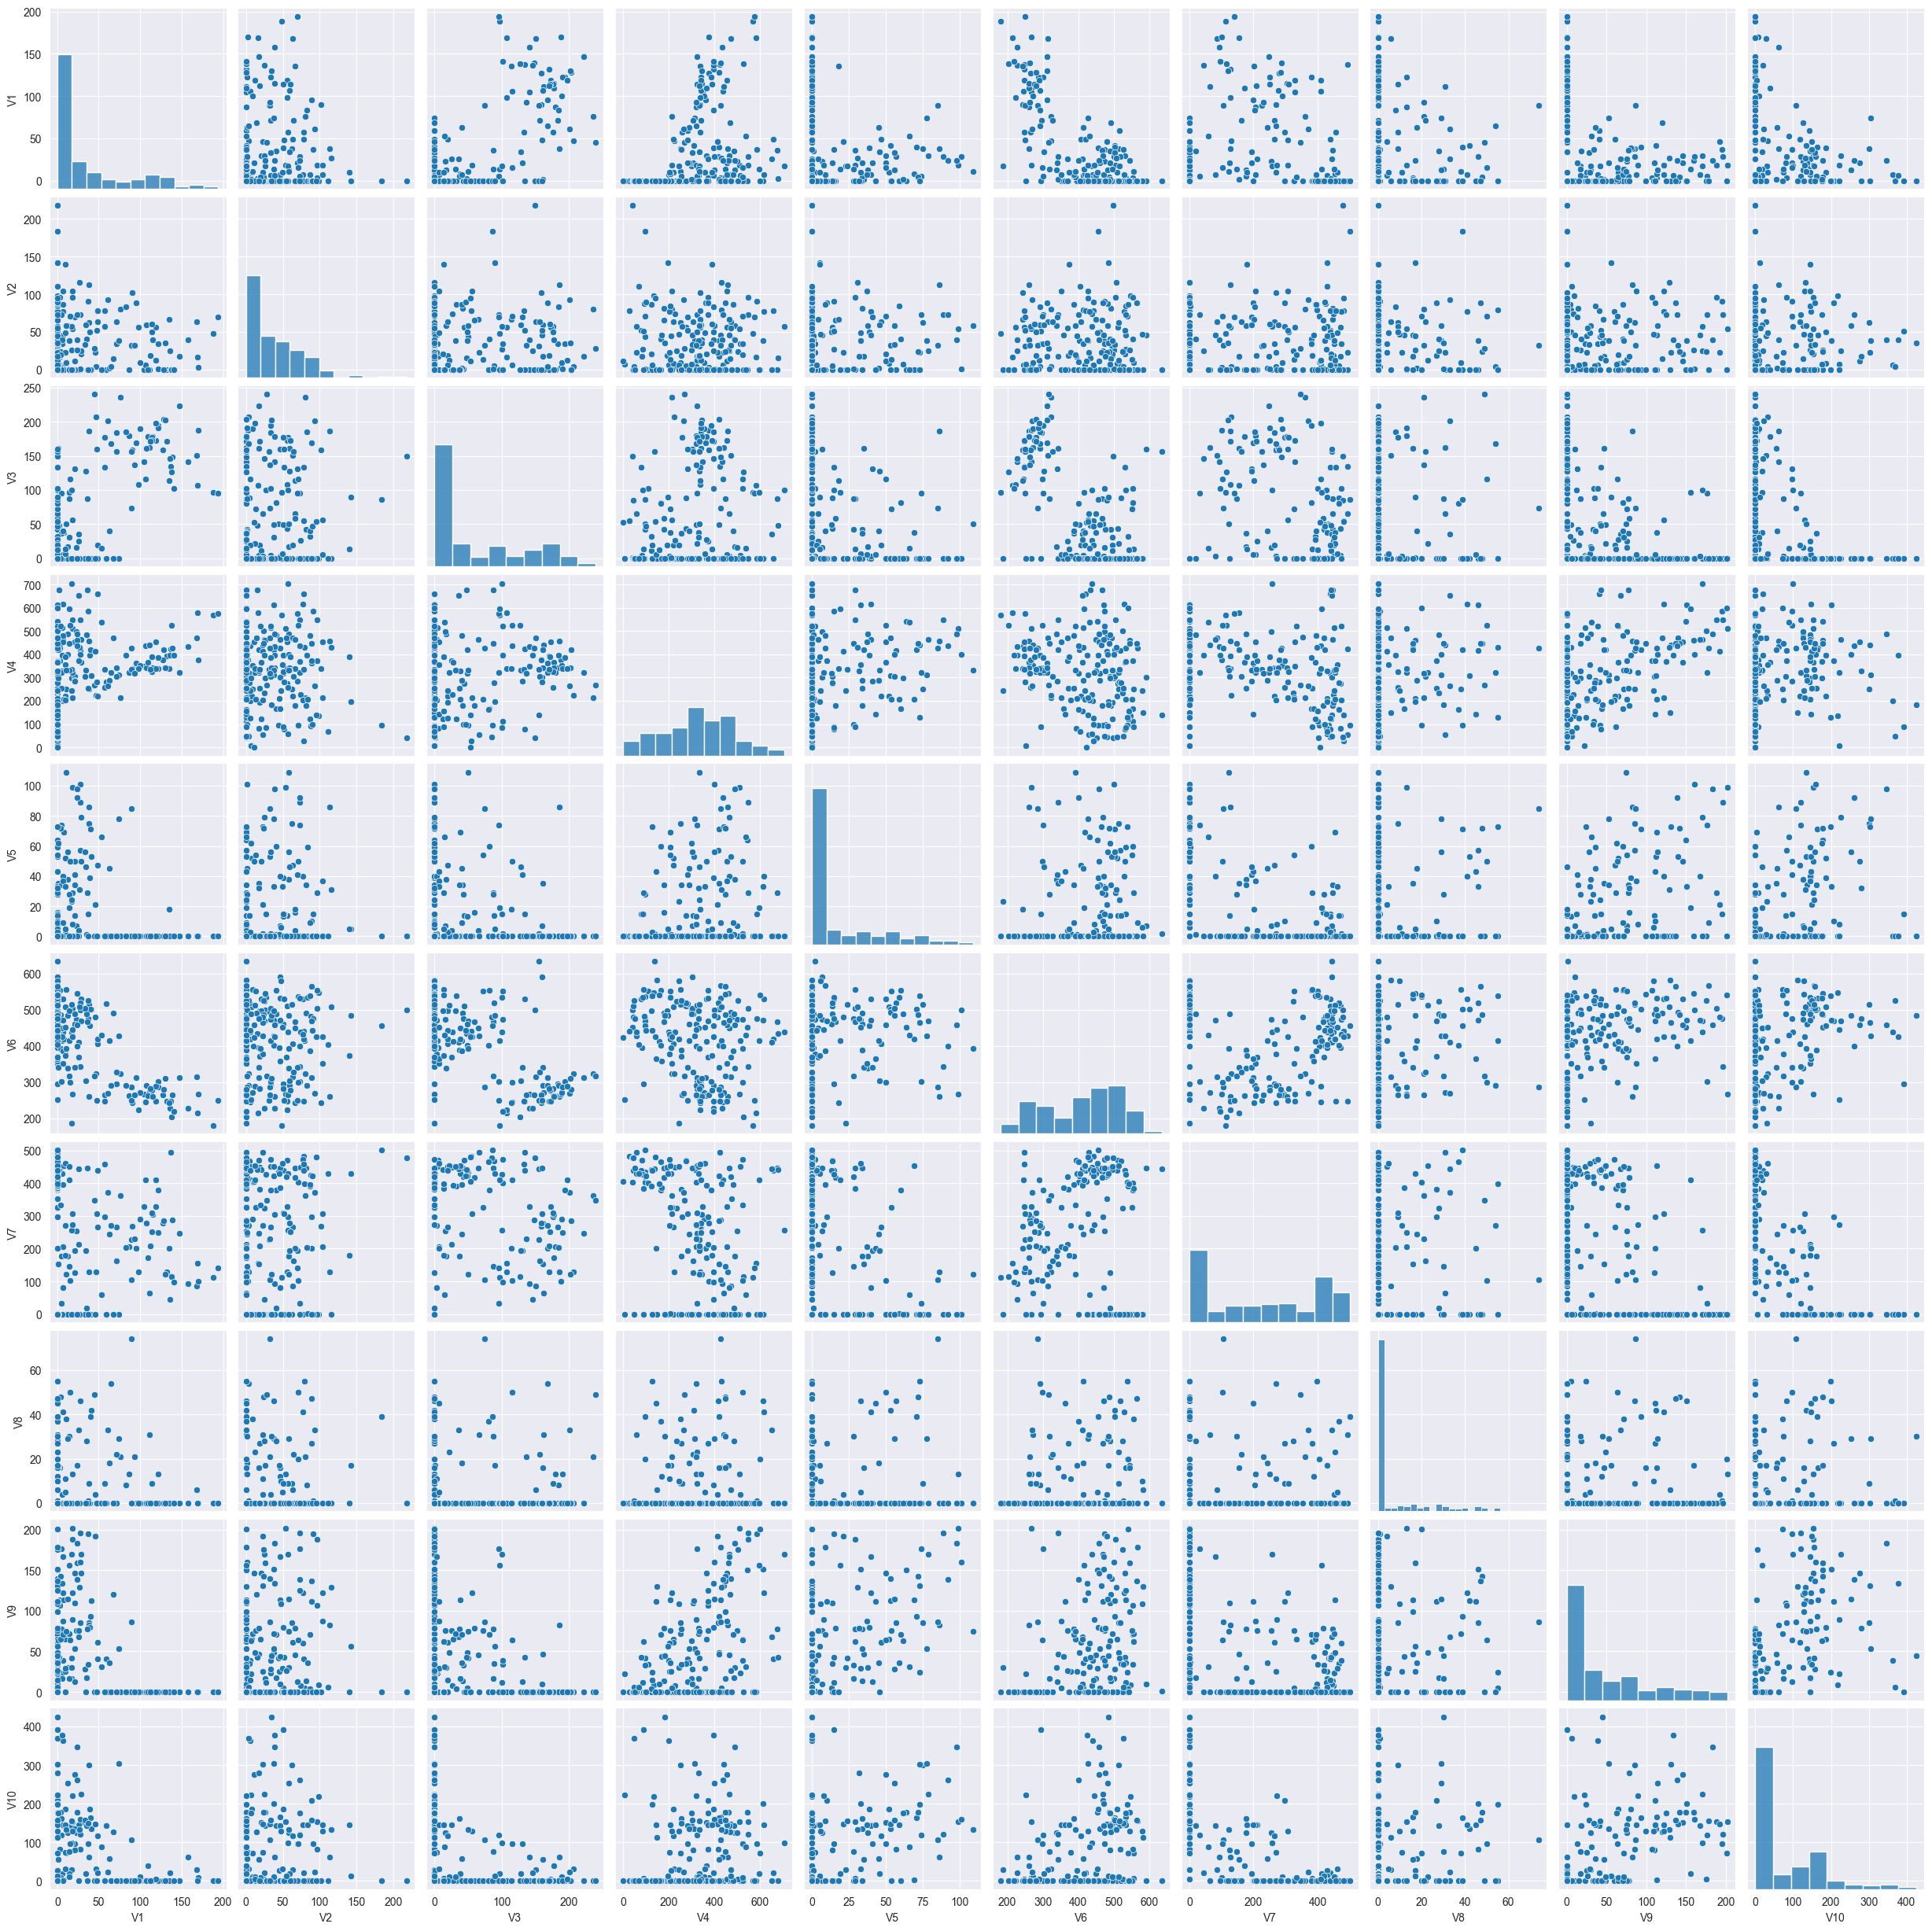

In [30]:
subset_features = df.columns[:10]

sns.pairplot(df[subset_features])
plt.show()